In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\barka\OneDrive\post_data_prep_all_zones.csv')

In [3]:
df.head()

,pickup_date,weekday,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis,Zone
0,2019-01-01,Tuesday,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41,4
1,2019-01-01,Tuesday,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78,4
2,2019-01-01,Tuesday,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62,4
3,2019-01-01,Tuesday,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65,4
4,2019-01-01,Tuesday,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30,4


In [4]:
df = df.drop(df[df.trip_time < 5].index)

In [5]:
trip_time = df['trip_time'].tolist()

In [6]:
print(f'{min(trip_time)} ~ {max(trip_time)}')

5.0 ~ 62.8


In [7]:
df.head()

,pickup_date,weekday,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis,Zone
0,2019-01-01,Tuesday,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41,4
1,2019-01-01,Tuesday,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78,4
2,2019-01-01,Tuesday,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62,4
3,2019-01-01,Tuesday,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65,4
4,2019-01-01,Tuesday,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30,4


In [9]:
len(df)

566082

<AxesSubplot:>

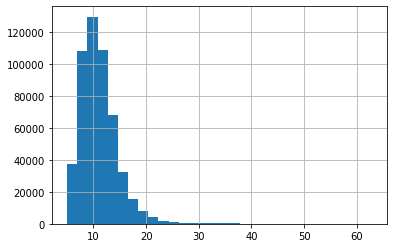

In [8]:
df['trip_time'].hist(bins=30)

In [15]:
df_1 = df.loc[(df['trip_time'] < 10)] # Less than 10 min
df_2 = df.loc[(df['trip_time'] > 10) & (df['trip_time'] < 15)] # Between 10 min and 15 min
df_3 = df.loc[(df['trip_time'] > 15)] # More than 15 min

In [16]:
len(df_1)

224668

In [17]:
len(df_2)

236900

In [18]:
len(df_3)

58228

In [21]:
path = r'C:\Users\barka\OneDrive\Final Project\Data\Manhattan\2019\Model Learning'
df_1.to_csv(path+'\less_than_10.csv',index=False)
df_2.to_csv(path+r'\between_10_and_15.csv',index=False)
df_3.to_csv(path+'\more_than_15',index=False)
